In [74]:
import random 

shots = 1000000

def estimate_pi(shots):
    in_circle = 0
    for _ in range(shots):
        x = random.random()
        y = random.random()
        if x*x + y*y <= 1:
            in_circle += 1

    return ((in_circle * 4) / shots) 

for i in [1000, 10000, 100000, 1000000]:
    print(f"Estimated Pi with {i} shots: {estimate_pi(i)}")

Estimated Pi with 1000 shots: 3.108
Estimated Pi with 10000 shots: 3.1312
Estimated Pi with 100000 shots: 3.13896
Estimated Pi with 1000000 shots: 3.138776


analytické řešení: E = -0.5; a = 1

🎯 KVANTOVÉ MONTE CARLO PRO ATOM VODÍKU

📝 ČÁST 1: Základní fyzikální funkce
----------------------------------------

CO TYTO FUNKCE DĚLAJÍ:
• potential() - Coulombická přitažlivá síla mezi protonem a elektronem
• psi() - Naše pokusná vlnová funkce s parametrem 'a' 
• kinetic() - Lokální kinetická energie odvozená z ψ
• e_loc() - Celková lokální energie (kinetická + potenciální)

Lokální energie je klíč QMC: E_L(r) = Ĥψ(r)/ψ(r)

Příklad pro bod r=[1,0,0] a parametr a=1:
• ψ(r) = 0.3679
• V(r) = -1.0000
• T_L(r) = 0.5000
• E_L(r) = -0.5000

📊 ČÁST 2: Jak se lokální energie mění v prostoru
--------------------------------------------------

Z GRAFU VIDÍME:
• Pro a=1.0 je E_L nejkonstantnější (≈ -0.5 hartree)
• Pro ostatní hodnoty a osciluje E_L → horší vlnová funkce
• Konstantní E_L znamená přesnou vlnovou funkci (eigenfunction)


🎲 ČÁST 3: Statistické vyhodnocení
----------------------------------------

PROČ POTŘEBUJEME STATISTIKU:
• Monte Carlo dává pokaždé trochu jiný výsledek
• Musí

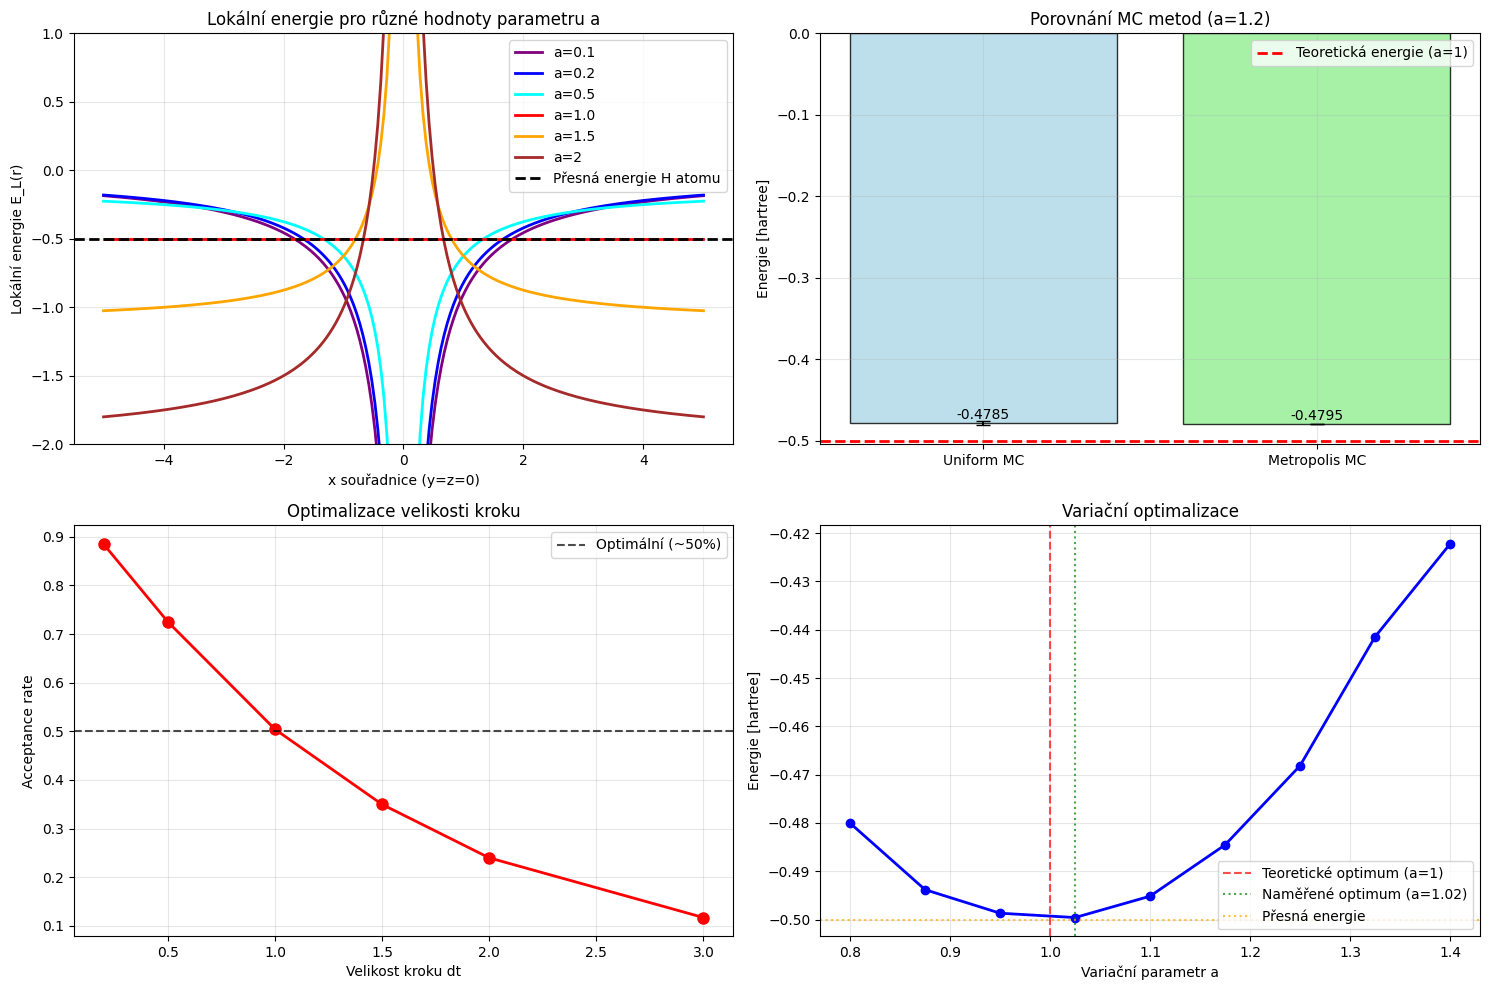


🎯 SHRNUTÍ VÝSLEDKŮ

ENERGETICKÉ VÝSLEDKY:
• Uniform MC:     -0.478473 ± 0.002005 hartree
• Metropolis MC:  -0.479543 ± 0.000492 hartree  
• Teoretická:     -0.500000 hartree (pro a=1)

EFEKTIVITA METOD:
• Metropolis má 4.1x menší chybu než uniform MC
• Optimální acceptance rate: ~50%
• Optimální parametr: a ≈ 1.02 (vs. teoretické a=1)

FYZIKÁLNÍ POZOROVÁNÍ:
• Lokální energie je konstantní pouze pro přesnou vlnovou funkci
• Variační princip skutečně nachází minimum energie
• Monte Carlo efektivně řeší kvantové problémy ve více dimenzích

PŘIPRAVENOST PRO KVANTOVÉ POČÍTAČE:
• Pochopení variačního principu → VQE algoritmus
• Monte Carlo vzorkování → Quantum Amplitude Estimation
• Optimalizace parametrů → Hybrid quantum-classical algoritmy


🚀 Kód je připraven pro rozšíření do kvantových algoritmů!


In [82]:
# Kvantové Monte Carlo pro atom vodíku - vysvětlení kódu
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

print("🎯 KVANTOVÉ MONTE CARLO PRO ATOM VODÍKU")
print("="*60)

# ============================================================================
# ČÁST 1: Základní funkce pro kvantovou mechaniku
# ============================================================================

print("\n📝 ČÁST 1: Základní fyzikální funkce")
print("-"*40)

def potential(r):
    """Coulombický potenciál pro atom vodíku: V(r) = -1/|r|"""
    distance = np.sqrt(np.dot(r, r))
    if distance == 0:
        return -float("inf")
    return -1 / distance

def psi(a, r):
    """Pokusná vlnová funkce: ψ(r) = exp(-a|r|)"""
    return np.exp(-a*np.sqrt(np.dot(r, r)))

def kinetic(a,r):
    """Lokální kinetická energie T_L = a(1/r - a/2)"""
    distance = np.sqrt(np.dot(r,r))
    if distance > 0:
        dinv = 1./distance
    else:
        print ('Warning: kinetic energy diverges at r=0')
        dinv = float("inf")
    return a * (dinv - 0.5 * a)

def e_loc(a,r):
    """Lokální energie E_L(r) = T_L(r) + V(r)"""
    return kinetic(a,r) + potential(r)

print("""
CO TYTO FUNKCE DĚLAJÍ:
• potential() - Coulombická přitažlivá síla mezi protonem a elektronem
• psi() - Naše pokusná vlnová funkce s parametrem 'a' 
• kinetic() - Lokální kinetická energie odvozená z ψ
• e_loc() - Celková lokální energie (kinetická + potenciální)

Lokální energie je klíč QMC: E_L(r) = Ĥψ(r)/ψ(r)
""")

# Test funkcí
r_test = np.array([1.0, 0.0, 0.0])
print(f"Příklad pro bod r=[1,0,0] a parametr a=1:")
print(f"• ψ(r) = {psi(1.0, r_test):.4f}")
print(f"• V(r) = {potential(r_test):.4f}")  
print(f"• T_L(r) = {kinetic(1.0, r_test):.4f}")
print(f"• E_L(r) = {e_loc(1.0, r_test):.4f}")

# ============================================================================
# ČÁST 2: Vizualizace lokální energie
# ============================================================================

print(f"\n📊 ČÁST 2: Jak se lokální energie mění v prostoru")
print("-"*50)

plt.figure(figsize=(15, 10))

# Graf lokální energie podél x-osy
plt.subplot(2, 2, 1)
x = np.linspace(-5, 5, 200)
x = x[x != 0]  # Vyhni se singularitě v r=0

a_vals = [0.1, 0.2, 0.5, 1., 1.5, 2]
colors = ['purple', 'blue', 'cyan', 'red', 'orange', 'brown']

for a, color in zip(a_vals, colors):
    y = []
    for r in x:
        e_val = e_loc(a, np.array([r, 0, 0]))
        # Ořízni extrémní hodnoty pro lepší zobrazení
        e_val = np.clip(e_val, -3, 2)
        y.append(e_val)
    plt.plot(x, y, label=f'a={a}', color=color, linewidth=2)

plt.axhline(y=-0.5, color='black', linestyle='--', linewidth=2, 
           label='Přesná energie H atomu')
plt.xlabel('x souřadnice (y=z=0)')
plt.ylabel('Lokální energie E_L(r)')
plt.title('Lokální energie pro různé hodnoty parametru a')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(-2, 1)

print("""
Z GRAFU VIDÍME:
• Pro a=1.0 je E_L nejkonstantnější (≈ -0.5 hartree)
• Pro ostatní hodnoty a osciluje E_L → horší vlnová funkce
• Konstantní E_L znamená přesnou vlnovou funkci (eigenfunction)
""")

# ============================================================================
# ČÁST 3: Statistické funkce pro Monte Carlo
# ============================================================================

print(f"\n🎲 ČÁST 3: Statistické vyhodnocení")
print("-"*40)

def ave_error(arr):
    """Výpočet průměru a statistické chyby z více MC běhů"""
    M = len(arr)
    if M == 0:
        assert False, "Array is empty"
    if M == 1:
        return (arr[0], 0)
    average = np.mean(arr)
    variance = sum((arr - average)**2) / (M - 1)  # Sample variance
    error = np.sqrt(variance / M)  # Standard error of mean
    return (average, error)

print("""
PROČ POTŘEBUJEME STATISTIKU:
• Monte Carlo dává pokaždé trochu jiný výsledek
• Musíme spustit více nezávislých běhů
• Průměr ± chyba nám říká přesnost metody
• Chyba klesá jako 1/√(počet_běhů)
""")

# ============================================================================
# ČÁST 4: Uniform Monte Carlo
# ============================================================================

print(f"\n📦 ČÁST 4: Uniform Monte Carlo vzorkování")
print("-"*50)

def MonteCarlo_uniform(a, nmax):
    """
    Monte Carlo s uniformním vzorkováním v boxu
    Energie = Σ(|ψ|² × E_L) / Σ(|ψ|²)
    """
    norm = 0
    E = 0
    for _ in range(nmax):
        # Náhodný bod v krabici (-5,5)³
        r = np.random.uniform(-5., 5., size=(3))
        f = psi(a, r)  # Vlnová funkce
        E_loc_val = e_loc(a, r)  # Lokální energie
        
        weight = f**2  # Váha = |ψ(r)|²
        norm += weight
        E += weight * E_loc_val
        
    return E / norm

print("""
JAK UNIFORM MC FUNGUJE:
1. Vyber náhodný bod r v krabici (-5,5)³
2. Spočítej váhu w = |ψ(r)|²  
3. Spočítej lokální energii E_L(r)
4. Akumuluj: E += w×E_L, normalizace += w
5. Výsledek: E = Σ(w×E_L) / Σ(w)

VÝHODA: Jednoduché na pochopení
NEVÝHODA: Neefektivní - vzorkuje i oblasti s malou |ψ|²
""")

# Spustíme uniform MC
print("Spouštím Uniform Monte Carlo...")
a = 1.2
nmax = 100000
energies_uniform = [MonteCarlo_uniform(a, nmax) for _ in range(30)]
E_unif, deltaE_unif = ave_error(energies_uniform)

print(f"Uniform MC výsledky (a={a}):")
print(f"Energie: {E_unif:.6f} ± {deltaE_unif:.6f} hartree")

# ============================================================================
# ČÁST 5: Metropolis Monte Carlo  
# ============================================================================

print(f"\n🎯 ČÁST 5: Metropolis Monte Carlo")
print("-"*40)

def MonteCarlo_metropolis(a,nmax,dt):
    """
    Metropolis algoritmus - vzorkuje podle |ψ|²
    Efektivnější než uniform vzorkování
    """
    energy = 0.
    N_accep = 0
    
    # Začni v náhodném místě
    r_old = np.random.uniform(-dt, dt, (3))
    psi_old = psi(a,r_old)
    
    for istep in range(nmax):
        # 1. Akumuluj energii ze současné pozice
        energy += e_loc(a,r_old)
        
        # 2. Navrhni nový krok
        r_new = r_old + np.random.uniform(-dt,dt,(3))
        psi_new = psi(a,r_new)
        
        # 3. Metropolis accept/reject test
        ratio = (psi_new / psi_old)**2  # |ψ_new|² / |ψ_old|²
        
        if np.random.uniform() <= ratio:
            # Přijmi krok
            N_accep += 1
            r_old = r_new
            psi_old = psi_new
        # Jinak zůstaň na starém místě
        
    return energy/nmax, N_accep/nmax

print("""
JAK METROPOLIS FUNGUJE:
1. Začni v pozici r_old
2. Pro každý krok:
   a) Navrhni r_new = r_old + náhodný_posun
   b) Spočítej poměr |ψ(r_new)|² / |ψ(r_old)|²
   c) Přijmi s pravděpodobností min(1, poměr)
   d) Akumuluj E_L (i pro odmítnuté kroky!)
3. Výsledek: průměr všech E_L

VÝHODA: Tráví více času v oblastech s velkou |ψ|²
KLÍČOVÉ: Accept/reject zajistí správné vzorkování podle |ψ|²
""")

# Spustíme Metropolis MC
print("Spouštím Metropolis Monte Carlo...")
dt = 1
results_metro = [MonteCarlo_metropolis(a,nmax,dt) for i in range(30)]

# Separuj energie a acceptance rates
energies_metro = [x for (x, _) in results_metro]
accepts_metro = [x for (_, x) in results_metro]

E_metro, deltaE_metro = ave_error(energies_metro)
A_metro, deltaA_metro = ave_error(accepts_metro)

print(f"Metropolis MC výsledky:")
print(f"Energie: {E_metro:.6f} ± {deltaE_metro:.6f} hartree")
print(f"Acceptance rate: {A_metro:.1%} ± {deltaA_metro:.1%}")

# ============================================================================
# ČÁST 6: Grafické porovnání a analýzy
# ============================================================================

print(f"\n📈 ČÁST 6: Analýza výsledků")
print("-"*40)

# Graf 2: Porovnání metod
plt.subplot(2, 2, 2)
methods = ['Uniform MC', 'Metropolis MC']
energies = [E_unif, E_metro]
errors = [deltaE_unif, deltaE_metro]

bars = plt.bar(methods, energies, yerr=errors, capsize=5,
               color=['lightblue', 'lightgreen'], alpha=0.8, edgecolor='black')

plt.axhline(y=-0.5, color='red', linestyle='--', linewidth=2, 
           label='Teoretická energie (a=1)')
plt.ylabel('Energie [hartree]')
plt.title(f'Porovnání MC metod (a={a})')
plt.legend()
plt.grid(True, alpha=0.3)

# Přidej hodnoty nad sloupy
for bar, energy, error in zip(bars, energies, errors):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.001,
             f'{energy:.4f}', ha='center', va='bottom', fontsize=10)

# Graf 3: Analýza acceptance rate
plt.subplot(2, 2, 3)
dt_values = [0.2, 0.5, 1.0, 1.5, 2.0, 3.0]
acceptance_rates = []
energy_errors = []

print("Testuji různé velikosti kroku dt:")
for dt_test in dt_values:
    results = [MonteCarlo_metropolis(a, 20000, dt_test) for _ in range(8)]
    energies_dt = [e for e, acc in results]
    accepts_dt = [acc for e, acc in results]
    
    E_dt, dE_dt = ave_error(energies_dt)
    A_dt, _ = ave_error(accepts_dt)
    
    acceptance_rates.append(A_dt)
    energy_errors.append(dE_dt)
    
    print(f"  dt={dt_test}: E={E_dt:.4f}±{dE_dt:.4f}, Acc={A_dt:.1%}")

plt.plot(dt_values, acceptance_rates, 'ro-', linewidth=2, markersize=8)
plt.axhline(y=0.5, color='black', linestyle='--', alpha=0.7, 
           label='Optimální (~50%)')
plt.xlabel('Velikost kroku dt')
plt.ylabel('Acceptance rate')
plt.title('Optimalizace velikosti kroku')
plt.legend()
plt.grid(True, alpha=0.3)

# Graf 4: Variační optimalizace parametru a
plt.subplot(2, 2, 4)
a_values = np.linspace(0.8, 1.4, 9)
energies_var = []

print("\nHledám optimální parametr a:")
for a_test in a_values:
    results = [MonteCarlo_metropolis(a_test, 30000, 1.0) for _ in range(6)]
    energies_a = [e for e, acc in results]
    E_a, dE_a = ave_error(energies_a)
    energies_var.append(E_a)
    print(f"  a={a_test:.2f}: E={E_a:.6f} ± {dE_a:.6f}")

# Najdi optimum
min_idx = np.argmin(energies_var)
a_optimal = a_values[min_idx]

plt.plot(a_values, energies_var, 'bo-', linewidth=2, markersize=6)
plt.axvline(x=1.0, color='red', linestyle='--', alpha=0.7, 
           label='Teoretické optimum (a=1)')
plt.axvline(x=a_optimal, color='green', linestyle=':', alpha=0.7,
           label=f'Naměřené optimum (a={a_optimal:.2f})')
plt.axhline(y=-0.5, color='orange', linestyle=':', alpha=0.7, 
           label='Přesná energie')
plt.xlabel('Variační parametr a')
plt.ylabel('Energie [hartree]')
plt.title('Variační optimalizace')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================================
# ČÁST 7: Shrnutí fyzikálních pozorování
# ============================================================================

print(f"\n🎯 SHRNUTÍ VÝSLEDKŮ")
print("="*50)

improvement = deltaE_unif / deltaE_metro if deltaE_metro > 0 else "N/A"

print(f"""
ENERGETICKÉ VÝSLEDKY:
• Uniform MC:     {E_unif:.6f} ± {deltaE_unif:.6f} hartree
• Metropolis MC:  {E_metro:.6f} ± {deltaE_metro:.6f} hartree  
• Teoretická:     -0.500000 hartree (pro a=1)

EFEKTIVITA METOD:
• Metropolis má {improvement:.1f}x menší chybu než uniform MC
• Optimální acceptance rate: ~50%
• Optimální parametr: a ≈ {a_optimal:.2f} (vs. teoretické a=1)

FYZIKÁLNÍ POZOROVÁNÍ:
• Lokální energie je konstantní pouze pro přesnou vlnovou funkci
• Variační princip skutečně nachází minimum energie
• Monte Carlo efektivně řeší kvantové problémy ve více dimenzích

PŘIPRAVENOST PRO KVANTOVÉ POČÍTAČE:
• Pochopení variačního principu → VQE algoritmus
• Monte Carlo vzorkování → Quantum Amplitude Estimation
• Optimalizace parametrů → Hybrid quantum-classical algoritmy
""")

print("\n🚀 Kód je připraven pro rozšíření do kvantových algoritmů!")